# ข้อมูล Time Series (หรือข้อมูลอนุกรมเวลา)

คือชุดข้อมูลที่มีค่าของข้อมูลอ้างอิงตามเวลา โดยแต่ละอนุกรมเวลาจะมีการบันทึกข้อมูลหรือค่าที่วัดได้ ณ เวลานั้น ๆ \
เช่น ค่าอุณหภูมิ ค่าสภาพอากาศ จำนวนผู้เข้าเว็บ ณ เวลานั้น ๆ ข้อมูลการจราจรตลอดวัน ราคาหุ้น ยอดขายรายวัน รายเดือน ปริมาณการใช้ไฟรายชั่วโมง รายวัน ฯลฯ

สิ่งที่สนใจสำหรับข้อมูล Time Series คือ แนวโน้ม(Trend) ความแปรผันตามฤดูกาล(Seasonality) และ วัฏจักร(Cycle)\
เพื่อนำไปศึกษาวิเคราะห์และการคาดการณ์พยากรณ์(Forecasting)\
เช่น จะมียอดใช้กระแสไฟฟ้าเพิ่มขึ้นใน 5 ปีข้างหน้าเท่าใด จะมียอดขายสินค้าเท่าใด เพื่อที่จะได้เตรียมการรองรับ

ปกติการเก็บข้อมูล มักให้ค่าอนุกรมเวลาเป็นแกนหลัก (แกน x หรือ index ของ DF)

เมื่อพล็อตกราฟ จะนิยมให้เวลาอยู่แกน x ส่วนค่าของข้อมูลอยู่แกน y (เช่น แกนx แสดงวันเวลา ส่วนแกน y แสดงปริมาณการใช้กระแสไฟฟ้า)

การดูข้อมูล Time Series นอกจากจะดูรวม ๆ แล้ว อาจจะต้องดูเฉพาะช่วงเวลาที่สนใจวิเคราะห์ เช่น ดูปริมาณการใช้ไฟในช่วงหน้าร้อน หน้านาว ต้นปี ปลายปี ฯลฯ 

In [2]:
#ใช้ pandas เปลี่ยนเป็น timestamp ด้วย .to_datetime()

import pandas as pd
pd.to_datetime('2020-10-6')   #เปลี่ยนวันที่ (str) เป็น timestamp 

#จะได้ข้อมูลรูปแบบ ปี เดือน วัน เวลา

Timestamp('2020-10-06 00:00:00')

In [3]:
#ใช้เครื่องหมาย / หรือ am, pm ก็ได้ เช่น
#pd.to_datetime('2020/10/6 5:20pm')
#pd.to_datetime('6 Oct 2020 5:20pm')

In [4]:
#กรณีที่รูปแบบข้อมูล วัน เดือน ปี เมื่อแปลงแล้วจะเป็น ปี เดือน วัน บางครั้งอาจไม่ตรงกับข้อมูลจริงที่บันทึกไว้ (จากเดือน 6 เป็นเดือน 10)
pd.to_datetime('10-6-2020') #วันที่จริง ๆ เป็นเดือน 6

Timestamp('2020-10-06 00:00:00')

In [5]:
#เปลี่ยนแล้วกลายเป็นเดือน 10

In [6]:
#ต้องกำหนดค่า dayfirst=True เพื่อบอกว่าค่าตัวแรก คือ วันที่ ไม่ใช่เดือน

pd.to_datetime('10-6-2020', dayfirst=True)

Timestamp('2020-06-10 00:00:00')

In [7]:
#หรือกำหนด format โดยใส่เครื่องหมายให้ตรงกับรูปแบบ
pd.to_datetime('1-6-2020', format='%d-%m-%Y')

Timestamp('2020-06-01 00:00:00')

In [8]:
#แปลงข้อมูลวันที่แบบ list ได้ (ข้อมูลหลาย ๆ วัน เช่น)
pd.to_datetime(['2020-6-2', '2020-6-3', '2020-6-8'], format='%Y-%m-%d')

DatetimeIndex(['2020-06-02', '2020-06-03', '2020-06-08'], dtype='datetime64[ns]', freq=None)

In [9]:
#to_datetime() ยังไม่รองรับ พศ. ถ้าใส่เป็น พศ. จะ Error

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('data/opsd_germany_daily.csv')

In [11]:
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [16]:
df.isnull().sum()

Date              0
Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
dtype: int64

<AxesSubplot:>

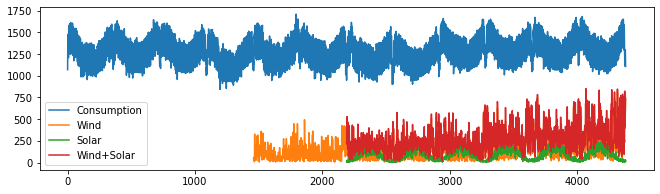

In [17]:
plt.rcParams['figure.figsize'] = 11,3
df.plot() 

#กราฟเส้นที่แน่นมาก ดูยาก ดูบางช่วงเวลาไม่ได้ 
#เบื้องต้นพบว่า เส้น Wind และ Solar ไม่มีในช่วงแรก ๆ (เพราะยังไม่ใช้ระบบนี้) ดังนั้นแถวแรก ๆ เลยขึ้น NaN
#ดังนั้นไม่ควรเติมค่าใด ๆ ลงไปทั้งสิ้น 

#แกน x แสดงตัวเลข 500 1000 3000 ซึ่งก็คือลำดับเลข index ของแถวแต่โดยตามหลักแล้วแกน x นี้ควรแสดงวันเดือนปี จึงจะเหมาะสม

In [18]:
#เปลี่ยนเป็นข้อมูลวันที่

df.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [19]:
df.Date = pd.to_datetime(df.Date, format='%Y-%m-%d')

In [20]:
df.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

In [21]:
df.set_index('Date', inplace=True)   #เปลี่ยนให้ Date เป็น Index ของ DF

In [23]:
df.shape

(4383, 4)

In [24]:
df.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [25]:
df.index[:10] #10 แถวแรก

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10'],
              dtype='datetime64[ns]', name='Date', freq=None)

<AxesSubplot:xlabel='Date'>

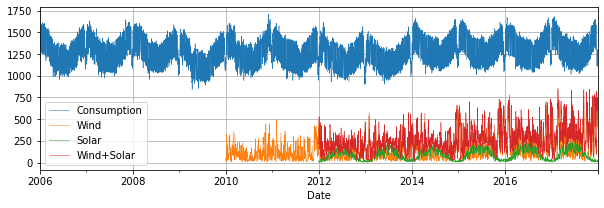

In [26]:
df.plot(grid=True, lw=0.5, figsize=(10, 3))

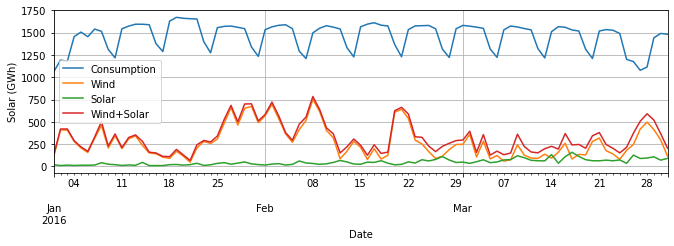

In [27]:
#พล็อตช่วงเดือน 1-3 ใน ปี 2016

df.loc['2016-1':'2016-3'].plot(grid=True)
plt.ylabel('Solar (GWh)');
plt.show()

<AxesSubplot:xlabel='Date'>

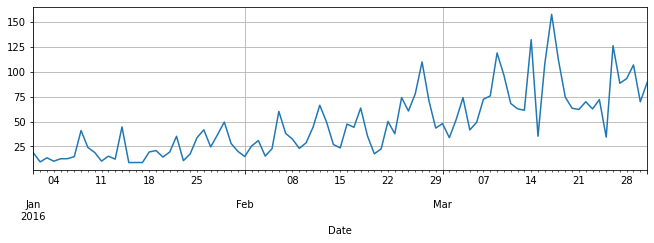

In [28]:
#พล็อตบางคอลัมน์ เช่น เฉพาะ Solar
df.Solar.loc['2016-1':'2016-3'].plot(grid=True)

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

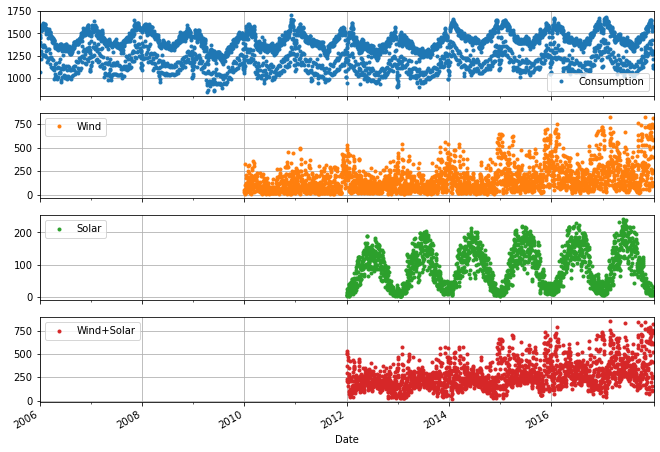

In [29]:
#พล็อตกราฟโดยลงจุด (ไม่ต้องลากเส้น) และแยกกราฟแต่ละข้อมูล
df.plot(marker ='.', linestyle='None', figsize=(11,8), subplots=True, grid=True)

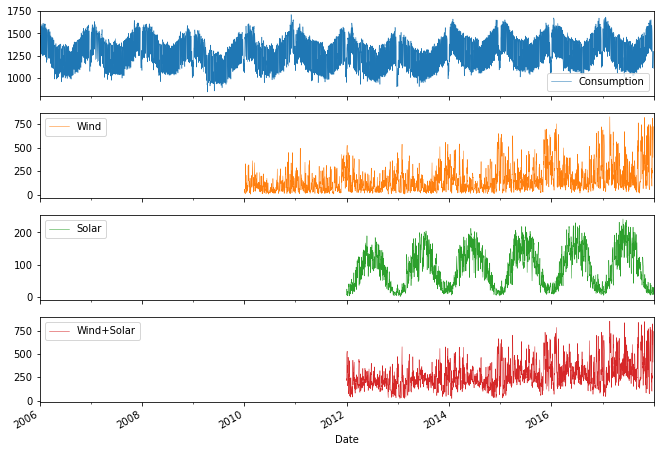

In [30]:
#ลงเส้นไม่ลงจุด
df.plot(lw=0.5, figsize=(11,8), subplots=True)
plt.show()

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

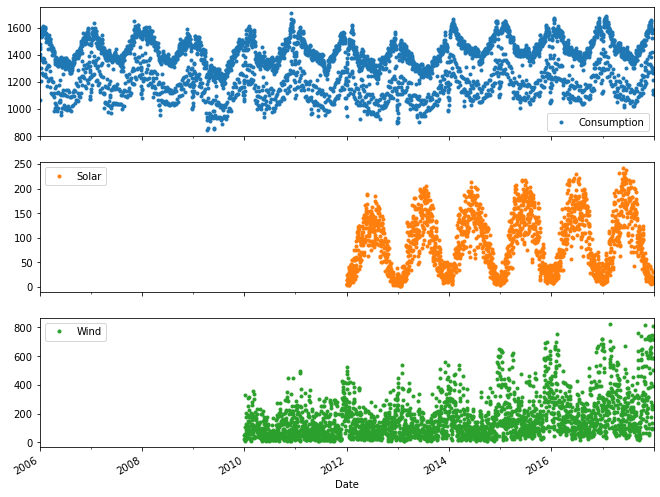

In [31]:
#ถ้าต้องการบางคอลัมน์ ให้ระบุคอลัมน์ที่ต้องการ เช่น ต้องการ 3 คอลัมน์ ใช้โค้ดดังนี้
cols_plot = ['Consumption', 'Solar', 'Wind']
df[cols_plot].plot(marker='.', linestyle='None', figsize=(11,9), subplots=True)

In [32]:
#กำหนดเวลา
#เราต้องการเลือกข้อมูลช่วงเวลาใด สามารถกำหนดได้หลายแบบ

#1) ระบุเวลาโดยตรง ด้วย .loc()

df.loc['2017-1-5']

Consumption    1547.238
Wind            261.758
Solar            20.797
Wind+Solar      282.555
Name: 2017-01-05 00:00:00, dtype: float64

In [33]:
#กรณีวันเวลาดังกล่าว มี Time Series ย่อยอยู่ด้วย ก็จะได้ข้อมูลย่อยนั้นออกมา 
#เช่น ถ้าในวันที่ 5 ม.ค. 2017 มีข้อมูลเวลา 10.00 11.00 12.00 ก็จะได้ข้อมูลเวลาวันดังกล่าวด้วย

In [34]:
#หากต้องการข้อมูลในเดือนใด (ทั้งเดือน) ก็ระบุปี เดือน (ไม่ต้องระบุวัน) เช่น
df.loc['2017-1']

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-01-01,1130.413,307.125,35.291,342.416
2017-01-02,1441.052,295.099,12.479,307.578
2017-01-03,1529.990,666.173,9.351,675.524
2017-01-04,1553.083,686.578,12.814,699.392
2017-01-05,1547.238,261.758,20.797,282.555
2017-01-06,1501.795,115.723,33.341,149.064
2017-01-07,1405.145,252.307,8.387,260.694
2017-01-08,1301.011,41.261,4.991,46.252
2017-01-09,1604.348,190.983,7.070,198.053


In [36]:
#หากต้องการทั้งปี 
df.loc['2017'] 
#df.loc['2017'].count()   นับจำนวน

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-01-01,1130.41300,307.125,35.291,342.416
2017-01-02,1441.05200,295.099,12.479,307.578
2017-01-03,1529.99000,666.173,9.351,675.524
2017-01-04,1553.08300,686.578,12.814,699.392
2017-01-05,1547.23800,261.758,20.797,282.555
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [37]:
#2)ระบุช่วงเวลา
#ระบุเวลาเริ่มต้นและสิ้นสุด

df.loc['2017-1-1':'2017-1-5']    #df.loc['วันเวลาเริ่มต้น':'วันเวลาสิ้นสุด']

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-01-01,1130.413,307.125,35.291,342.416
2017-01-02,1441.052,295.099,12.479,307.578
2017-01-03,1529.990,666.173,9.351,675.524
2017-01-04,1553.083,686.578,12.814,699.392
2017-01-05,1547.238,261.758,20.797,282.555


In [38]:
#กำหนดเวลาเริ่มต้นและระยเวลาด้วย .date_range()

date_range = pd.date_range('2017-1-1', periods=5, freq='d')   #periods คือระยะเวลา freq คือนับไป 5 วัน 
df.loc[date_range]

,Consumption,Wind,Solar,Wind+Solar
2017-01-01,1130.413,307.125,35.291,342.416
2017-01-02,1441.052,295.099,12.479,307.578
2017-01-03,1529.990,666.173,9.351,675.524
2017-01-04,1553.083,686.578,12.814,699.392
2017-01-05,1547.238,261.758,20.797,282.555


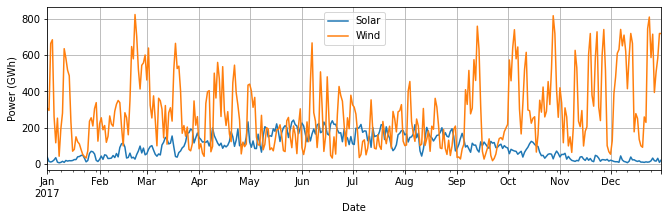

In [40]:
#พล็อตกราฟช่วงเวลา 
#เนื่องจากข้อมูลมีจำนวนมาก ดังนั้น เราต้องกำหนดช่วงเวลาที่จะให้พล็อตข้อมูล

cols_plot = ['Solar', 'Wind']
df[cols_plot].loc['2017'].plot(grid=True)
plt.ylabel('Power (GWh)');
plt.show()


#จากกราฟได้ข้อสรุปว่า
#Solar ผลิตกระแสไฟฟ้าได้มากในช่วงกลางปี ซึ่งช่วงดังกล่าวจะผลิตไฟฟ้าจากลมได้น้อย อาจเป็นเพราะช่วงนั้นแดดแรง ลมอ่อน
#Wind ผลิตกระแสไฟฟ้ามากในช่วงต้นปีและปลายปี อาจเป็นเพราะช่วงนั้นลมแรง แดดอ่อน

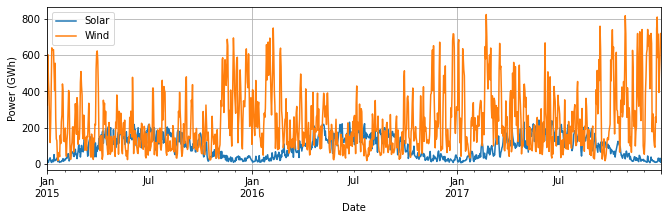

In [43]:
#ลองพล็อตปีอื่นด้วย

cols_plot = ['Solar', 'Wind']
df[cols_plot].loc['2015':'2017'].plot(grid=True)
plt.ylabel('Power (GWh)');
plt.show()

#แนวโน้มใกล้เคียงกับปี 2017

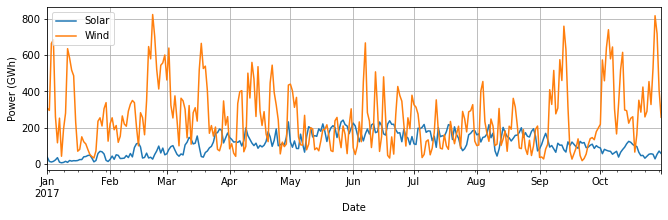

In [44]:
#ระบุช่วงเดือน 1-10 ปี 2017

cols_plot = ['Solar', 'Wind']
df[cols_plot].loc['2017-1':'2017-10'].plot(grid=True)
plt.ylabel('Power (GWh)');
plt.show()

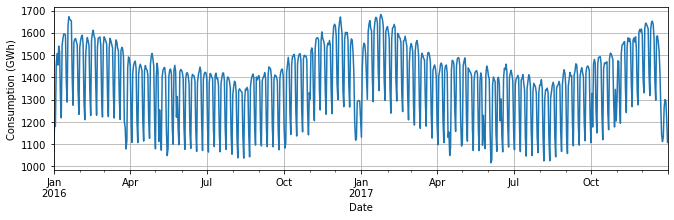

In [48]:
#ดูปริมาณการใช้ไฟ 2 ปี 2016-2017
df.Consumption.loc['2016':'2017'].plot(grid=True)
plt.ylabel('Consumption (GWh)');
plt.show()

#กลางปี ใช้ไฟน้อย ต้นปีปลายปี ใช้ไฟมาก (สูงสุดถึง 1600 GWh)

In [50]:
#หาค่าเฉลี่ยและการรวม
#เมื่อมีข้อมูลจำนวนมาก โดยเฉพาะอย่างยิ่ง ข้อมูลมีการกระเพื่อมขึ้นลงดังตัวอย่าง เส้นกราฟ อาจแน่นจนดูแทบไม่ออก 
#หากต้องการดูแนวโน้ม ค่ากลาง จะต้องใช้วิธีหาค่าเฉลี่ย ด้วยวิธี Rolling

#Rolling คือการนำข้อมูลในช่วงเวลาหนึ่งมาหาค่าเฉลี่ย เช่น ข้อมูลในตัวอย่างนี้เก็บค่าแบบรายวัน ต้องการหาค่าเฉลี่ยรายสัปดาห์ ก็นำ 7 วันมาเฉลี่ยแล้วแทนค่าที่ศูนย์กลาง

df.rolling(7, center=True).mean()    #นำค่า 7 วัน มาเฉลี่ย

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1208.214129,617.734286,17.807143,635.541429
2017-12-28,1203.265211,604.699143,19.240143,623.939286
2017-12-29,NaN,NaN,NaN,NaN


In [52]:
df.rolling(7, center=True).sum()   #ผลรวมค่า 7 วัน

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,9530.30000,NaN,NaN,NaN
2006-01-05,9669.10100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,8457.49890,4324.140,124.650,4448.790
2017-12-28,8422.85648,4232.894,134.681,4367.575
2017-12-29,NaN,NaN,NaN,NaN


In [53]:
#Resampling นำข้อมูลในช่วงเวลาหนึ่งมาหาค่าเฉลี่ยเหมือนกัน แต่จำนวนจะเพิ่มลดตามที่กำหนด เช่น จาก 7 วัน (7ข้อมูล หรือ7แถว) เฉลี่ยแล้วจะลดเหลือ 1 แถว

df.resample('7d').mean()   #7 วันมาเฉลี่ย

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1361.471429,NaN,NaN,NaN
2006-01-08,1478.517429,NaN,NaN,NaN
2006-01-15,1492.511714,NaN,NaN,NaN
2006-01-22,1513.590571,NaN,NaN,NaN
2006-01-29,1500.575000,NaN,NaN,NaN
...,...,...,...,...
2017-12-03,1556.561034,602.878429,16.795857,619.674286
2017-12-10,1546.841243,495.705857,17.758286,513.464143
2017-12-17,1462.551239,258.776143,10.276714,269.052857


In [54]:
df.resample('1w').mean()    #1 สัปดาห์มาเฉลี่ย

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN
...,...,...,...,...
2017-12-03,1536.236314,284.334286,18.320857,302.655143
2017-12-10,1554.824946,636.514714,16.440286,652.955000
2017-12-17,1543.856889,442.531857,18.143714,460.675571


In [55]:
df.resample('1m').sum()   #1 เดือนมารวม

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-31,45304.70400,0.000,0.000,0.000
2006-02-28,41078.99300,0.000,0.000,0.000
2006-03-31,43978.12400,0.000,0.000,0.000
2006-04-30,38251.76700,0.000,0.000,0.000
2006-05-31,38858.14300,0.000,0.000,0.000
...,...,...,...,...
2017-08-31,40029.77368,5499.798,4602.808,10102.606
2017-09-30,40078.56092,6287.730,3079.291,9367.021
2017-10-31,42355.21893,12480.097,2130.557,14610.654


In [61]:
#เฉลี่ยข้อมูลด้วย Rolling

#ดังที่ได้ทราบแล้วว่ามีข้อมูลจำนวนมาก เส้นกราฟอาจแน่นจนะดูไม่ออก เราต้องหาค่าเฉลี่ยแล้วเอามาพล็อตกราฟ
#ลดการแกว่งหรือการกระเพื่อมของข้อมูล แต่จำนวนแถวเท่าเดิม

#ดูค่าของข้อมูลก่อนเฉลี่ย
#ตัวอย่างคือ เลือกข้อมูล 7 วัน (1-7 ธ.ค. 2017) เลือกเฉพาะคอลัมน์ Consumption, Wind และ Solar

start, end = '2017-12-1', '2017-12-7'
columns = ['Consumption', 'Wind', 'Solar']

df[columns][start:end].round(1)    #ลิสต์ดูข้อมูล

,Consumption,Wind,Solar
Date,,,
2017-12-01,1593.0,52.3,19.3
2017-12-02,1391.9,126.3,16.5
2017-12-03,1330.3,387.5,12.4
2017-12-04,1621.0,479.8,10.7
2017-12-05,1643.7,611.5,11.0
2017-12-06,1639.1,632.5,7.6
2017-12-07,1628.5,743.7,43.0


In [58]:
#ดูผลการคำนวณ rolling

df_weekly_roll = df[columns].rolling(7, center=True).mean()
df_weekly_roll[start:end].round(1)         #round() สำหรับปัดทศนิยม

,Consumption,Wind,Solar
Date,,,
2017-12-01,1538.9,246.7,16.7
2017-12-02,1543.0,260.5,15.5
2017-12-03,1548.0,336.6,13.1
2017-12-04,1549.6,433.4,17.2
2017-12-05,1553.2,519.2,17.4
2017-12-06,1556.6,602.9,16.8
2017-12-07,1554.8,636.5,16.4


In [60]:
df[columns][start:end].mean().round(1) 

Consumption    1549.6
Wind            433.4
Solar            17.2
dtype: float64

In [62]:
#เฉลี่ยและรวมด้วย Resample
#Resample จะทำการเฉลี่ยหรือรวมคล้ายกับ Rolling 
#แต่จำนวนแถวจะลดลง เหลือเท่ากับจำนวนที่สั่งให้ทำการคำนวณ เช่น หาค่าเฉลี่ยรายสัปดาห์

df_weekly_resampling = df[columns].resample('7d').mean()
df_weekly_resampling.tail()

,Consumption,Wind,Solar
Date,,,
2017-12-03,1556.561034,602.878429,16.795857
2017-12-10,1546.841243,495.705857,17.758286
2017-12-17,1462.551239,258.776143,10.276714
2017-12-24,1208.214129,617.734286,17.807143
2017-12-31,1107.114880,721.176000,19.980000


In [65]:
df_weekly_resampling.shape

#เหลือ 627 แถว

#Resample จำนวนแถวจะลดลง เพราะทำการเฉลี่ยค่าแล้วยุบตามที่เรากำหนด (4383/7 เหลือประมาณ 627)
#ค่าเฉลี่ยที่ได้ ใกล้เคียงกับ Rolling (2017-12-03) ใกล้เคียงกันวันที่ 4 ของ Rolling

(627, 3)

In [66]:
#ตัวอย่างโค้ดรวมยอดรายเดือน จะได้ตารางที่บอกว่าแต่ละเดือนมีการใช้งานและการผลิตเท่าใด

df_weekly_resampling = df[columns].resample('m').sum()
df_weekly_resampling.tail().round(1)

,Consumption,Wind,Solar
Date,,,
2017-08-31,40029.8,5499.8,4602.8
2017-09-30,40078.6,6287.7,3079.3
2017-10-31,42355.2,12480.1,2130.6
2017-11-30,44339.7,10259.0,831.0
2017-12-31,44511.1,14725.4,494.2


In [68]:
#ตรวจสอบโดยเทียบกับการสั่งรวมในเดือนที่ต้องการ

start, end = '2017-12-1', '2017-12-31'
df[columns][start:end].sum().round(1)

#จะได้ค่า 44511.1 เท่ากับที่ได้จาก .resample() เดือน 12 ข้อดีของการใช้ .resample() คือเราจะได้การรวมแต่ละเดือนอัตโนมัติด้วยคำสั่งสั้น ๆ 
#ถ้าสั่งด้วยมือจะต้องไล่ทำแต่ละเดือน หรือถ้าใช้ Excel คงต้องคลิกวุ่นวายพอสมควร

#Resample สั่งรวมระยะเวลาเท่าใดก็ได้ เช่น รายสัปดาห์('w') ราย2สัปดาห์('2w') รายไตรมาส('q') หรือรายปี('y')

Consumption    44511.1
Wind           14725.4
Solar            494.2
dtype: float64

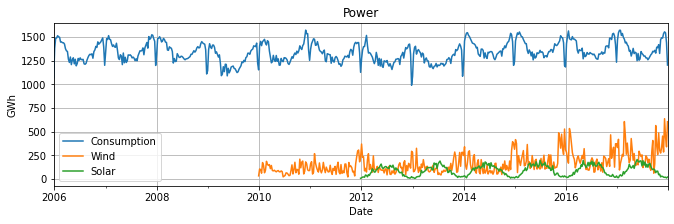

In [70]:
#พล็อตกราฟ Resample และ Rolling

df_resampling = df[columns].resample('1w').mean()    #resample รายสัปดาห์

df_resampling.plot(grid=True)
plt.ylabel('GWh');
plt.title('Power')
plt.show()

#เห็นแนวโน้มชัดเจนกว่ากราฟที่ยังไม่ได้คำนวณ resample มาก (ก่อนนี้เส้นแน่นมากจนดูไม่ออก มันทึบไปหมด)

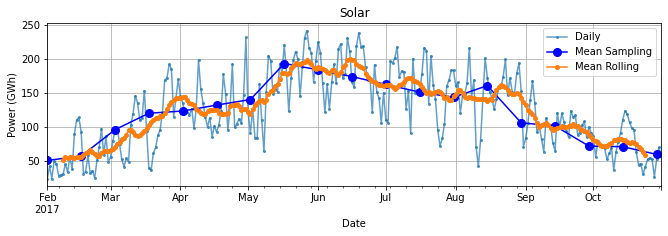

In [73]:
#เทียบระหว่าง ค่าจริงปกติ ค่า Resample และค่า Rolling

start, end = '2017-2','2017-10'
df.Solar.loc[start:end].plot(marker='o', label='Daily', markersize=2, alpha=0.7)
df.Solar.loc[start:end].resample('15d').mean().plot(marker='o', c='blue',
                                                 markersize=8, label='Mean Sampling')
df.Solar.loc[start:end].rolling(15, center=True).mean().plot(marker='o',
                                                 markersize=4, label='Mean Rolling')
plt.ylabel('Power (GWh)');
plt.title('Solar')
plt.legend()
plt.grid()
plt.show()

#alpha คือค่าความโปร่ง ความเข้มของเส้น (0-1 ค่าต่ำสีโปร่ง ค่าสูงสีเข้ม)
#c คือสี เช่น 'b' = blue, 'y' = yellow
#marker คือจุดมาร์คตำแหน่งข้อมูล เช่น  'o' คือจุดกลม
#markersize = ขนาดจุดมาร์ค
#label = ข้อความกำกับเส้นกราฟ

#สรุปข้อมูลได้ว่า กลางปีผลิตไฟฟ้าด้วย Solar ได้มากกว่าช่วงต้นปีและปลายปี

#ข้อสังเกตคือ กราฟของข้อมูลจริงมียอดแหลม เพราะบันทึกค่ารายวัน ข้อมูลมีการแกว่งมาก
#Rolling และ Resample จะทำการเฉลี่ยข้อมูล ทำให้ยอดแหลมลดง เหมาะกับการดูแนวโน้ม หรือลด Noise โดยเฉพาะกรณีอ่านค่าเซ็นเซอร์ ฯลฯ
#Resample(สีน้ำเงิน) เส้นจะเป็นหยัก ๆ เหลี่ยม ๆ มากกว่า Rolling เพราะแถวถูกยุบ (กรณีนี้ยุบจาก 15ข้อมูล ('15d') เหลือ 1 ข้อมูล)

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('data/opsd_germany_daily.csv')
df

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [9]:
df.Date = pd.to_datetime(df.Date)

In [10]:
df.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

In [12]:
df.set_index('Date', inplace=True)

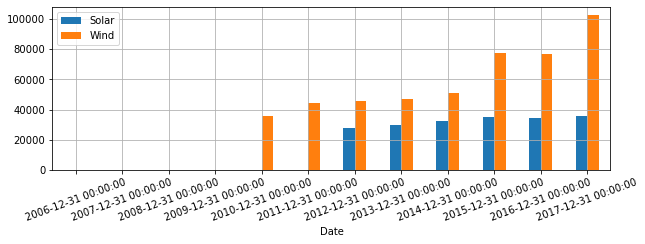

In [14]:
#กราฟแท่งกับข้อมูล Time Series 

columns = ['Solar','Wind']
yearly = df[columns].resample('y').sum()

yearly.plot(kind='bar', figsize=(10,3), rot=20)
plt.grid()
plt.show()

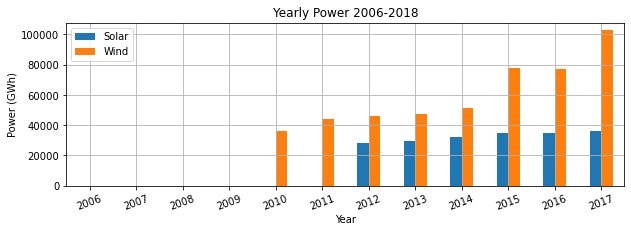

In [15]:
#การปรับแต่งรูปแบบแสดงที่แกน X ทำได้โดยใช้ฟังก์ชัน map มาช่วย
#หลักการคือส่งค่า datetime (ที่เป็น Index) เข้าฟังก์ชันแล้วตัดให้เหลือเท่าที่ต้องการ

def x_label(datetime):
    lb = str(datetime.year) 
    return lb

ax = yearly.plot(kind='bar', figsize=(10,3), rot=20)
ax.set_xticklabels(map(lambda x: x_label(x), yearly.index))
ax.set(xlabel="Year", ylabel="Power (GWh)")
ax.set(title="Yearly Power 2006-2018")
plt.grid()
plt.show()

In [16]:
#ข้อมูล Time Series ที่มีค่าเวลา 

#ในบางงาน Time Series จะมีค่าเวลาเข้ามาด้วย ไม่ได้มีแค่วันเดือนปี 

#เช่น เก็บค่าอุณหภูมิ ความชื้น ทุก ๆ 10 นาที 

import pandas as pd
import numpy as np

range = pd.date_range('2020-01-1', '2020-2-28', freq='10min')         #สร้างข้อมูลวันเวลา
df = pd.DataFrame(index = range)


df['temp'] = np.random.randint(low=10, high=40, size=df.shape[0])     # temp
df['humid'] = np.random.randint(low=50, high=70, size=df.shape[0])    # humid

df.reset_index(inplace=True)
df.columns = ['time','temp','humid']


#สังเกตว่าค่าข้อมูลจะมีทุกช่วง 10 นาที

In [17]:
df.shape

(8353, 3)

In [20]:
df.time = pd.to_datetime(df.time)
df.set_index('time', inplace=True)

In [21]:
#ระบุวันเดือนปีและเวลาได้เลย

df.loc['2020-01-15'].head()

,temp,humid
time,,
2020-01-15 00:00:00,31,64
2020-01-15 00:10:00,29,58
2020-01-15 00:20:00,29,54
2020-01-15 00:30:00,17,59
2020-01-15 00:40:00,38,64


In [22]:
chk_time = pd.to_datetime('2020-1-18 3pm')
df.loc[chk_time]

temp     34
humid    61
Name: 2020-01-18 15:00:00, dtype: int32

In [23]:
#แบบนี้ก็ได้ 

#chk_time = '2020-1-18 15:00'
#chk_time = '2020/1/18 15:00'

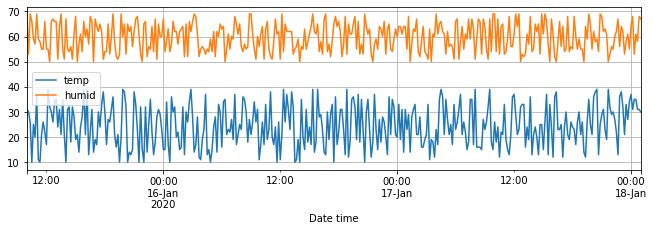

In [24]:
#พล็อตกราฟ ช่วงวันเวลาที่ต้องการ

import matplotlib.pyplot as plt
# %matplotlib inline

plt.rcParams['figure.figsize'] = 11,3        #กำหนดขนาดกราฟ

start = pd.to_datetime('2020-1-15 10:00')    #วันเวลาเริ่มต้น
end = pd.to_datetime('2020-1-18 1:00')       #วันเวลาสิ้นสุด

df.loc[start : end].plot(grid=True)  
plt.xlabel('Date time')
plt.show()


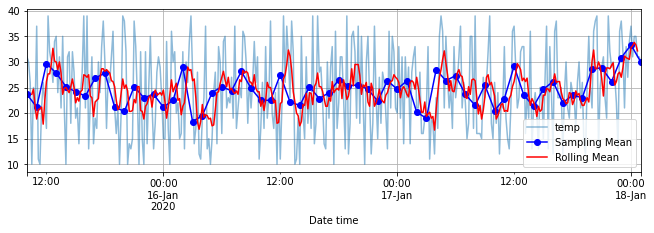

In [25]:
#สามารถใช้ Resample หรือ Rolling คำนวณค่าเฉลี่ยได้ เช่น ต้องการกราฟเฉลี่ยรายชั่วโมง

#ใช้ Rolling โดยจำนวนค่า Rolling = 6 คือนำ 6 ข้อมูลมาเฉลี่ยกัน (ในที่นี้ แต่ละข้อมูลห่างกัน 10 นาที Rolling 6 จึง = 1 ชั่วโมง)
#Resample('1h') คือเฉลี่ยราย 1 ชั่วโมง ดังนั้นเส้นกราฟ 2 วิธีนี้จะใกล้เคียงกัน

df_temp = df.temp.loc[start : end]                                           #ช่วงวันเวลา temp
df_sampling = df.temp.loc[start : end].resample('1h').mean()                 #Resample
df_rolling = df.temp.loc[start : end].rolling(6,center=True).mean()          #Rolling

df_temp.plot(grid=True, alpha=0.5)                                            #พล็อต temp ค่าปกติ
df_sampling.plot(c='b', marker='o', label='Sampling Mean')                    #พล็อต temp resample
df_rolling.plot(c='r',label='Rolling Mean',grid=True )                        #พล็อต temp rolling
plt.xlabel('Date time')
plt.legend()
plt.show()

In [40]:
#ข้อมูลปี พ.ศ. 

#ปกติแล้วถ้าใช้ปี พ.ศ. แล้วมาแปลง จะเกิด Error

#แต่ถ้าเลี่ยงไม่ได้ ก็มีวิธีแก้คือ นำข้อมูลมาแปลงจาก พ.ศ. ไปเป็น ค.ศ. ก่อน ดังนี้

import pandas as pd
import matplotlib.pyplot as plt

uri = 'data/date-Th.csv'
df = pd.read_csv(uri)
df.head()

,Name,Age,Score,Date
0,Kobkiat,25,35,1/8/2560
1,ณิแนน,22,26,20/8/2560
2,จอห์น,25,32,1/7/2561
3,Tim,35,29,11/12/2561
4,Steal,32,27,21/12/2561


In [41]:
df

,Name,Age,Score,Date
0,Kobkiat,25,35,1/8/2560
1,ณิแนน,22,26,20/8/2560
2,จอห์น,25,32,1/7/2561
3,Tim,35,29,11/12/2561
4,Steal,32,27,21/12/2561


In [44]:
df.dtypes

Name     object
Age       int64
Score     int64
Date     object
dtype: object

In [45]:
#แก้ไขโดยการแยกวัน เดือน ปีพศ. ด้วย .str.split()
df['D'] = df.Date.str.split('/', expand=True)[0]
df['M'] = df.Date.str.split('/', expand=True)[1]
df['Y'] = df.Date.str.split('/', expand=True)[2]

In [46]:
df

,Name,Age,Score,Date,D,M,Y
0,Kobkiat,25,35,1/8/2560,1,8,2560
1,ณิแนน,22,26,20/8/2560,20,8,2560
2,จอห์น,25,32,1/7/2561,1,7,2561
3,Tim,35,29,11/12/2561,11,12,2561
4,Steal,32,27,21/12/2561,21,12,2561


In [47]:
df.Y = df.Y.astype(int)   #คอลัมน์ Y ให้เปลี่ยนเป็น int
df['Y'] = df['Y'] - 543   #แปลงเป็น คศ.
df.Y = df.Y.astype(str)   #แปลงเป็น str

In [48]:
df

,Name,Age,Score,Date,D,M,Y
0,Kobkiat,25,35,1/8/2560,1,8,2017
1,ณิแนน,22,26,20/8/2560,20,8,2017
2,จอห์น,25,32,1/7/2561,1,7,2018
3,Tim,35,29,11/12/2561,11,12,2018
4,Steal,32,27,21/12/2561,21,12,2018


In [49]:
#รวมให้ได้รูปแบบ yyyy-mm-dd แล้วเก็บใน Date2
df['Date2'] = df.Y + '-' + df.M + '-' + df.D
df

,Name,Age,Score,Date,D,M,Y,Date2
0,Kobkiat,25,35,1/8/2560,1,8,2017,2017-8-1
1,ณิแนน,22,26,20/8/2560,20,8,2017,2017-8-20
2,จอห์น,25,32,1/7/2561,1,7,2018,2018-7-1
3,Tim,35,29,11/12/2561,11,12,2018,2018-12-11
4,Steal,32,27,21/12/2561,21,12,2018,2018-12-21


In [50]:
#ลบ D M Y
df.drop(columns=['D','M','Y'], inplace=True)

In [51]:
#เปลี่ยน วดป เป็น datetime แล้วเปลี่ยนเป็น index
df.Date2 = pd.to_datetime(df.Date2)
df.set_index('Date2', inplace=True)

In [52]:
df

,Name,Age,Score,Date
Date2,,,,
2017-08-01,Kobkiat,25,35,1/8/2560
2017-08-20,ณิแนน,22,26,20/8/2560
2018-07-01,จอห์น,25,32,1/7/2561
2018-12-11,Tim,35,29,11/12/2561
2018-12-21,Steal,32,27,21/12/2561


In [53]:
df.loc['2017']

,Name,Age,Score,Date
Date2,,,,
2017-08-01,Kobkiat,25,35,1/8/2560
2017-08-20,ณิแนน,22,26,20/8/2560


In [54]:
#หรือใช้วิธีนี้ก็ได้
#def get_datetime_EN(sc)
    #return str(int(sc.split)('/')[2]-543) + '-' + sc.split('/')[1] + '-' + sc.split('/')[0]